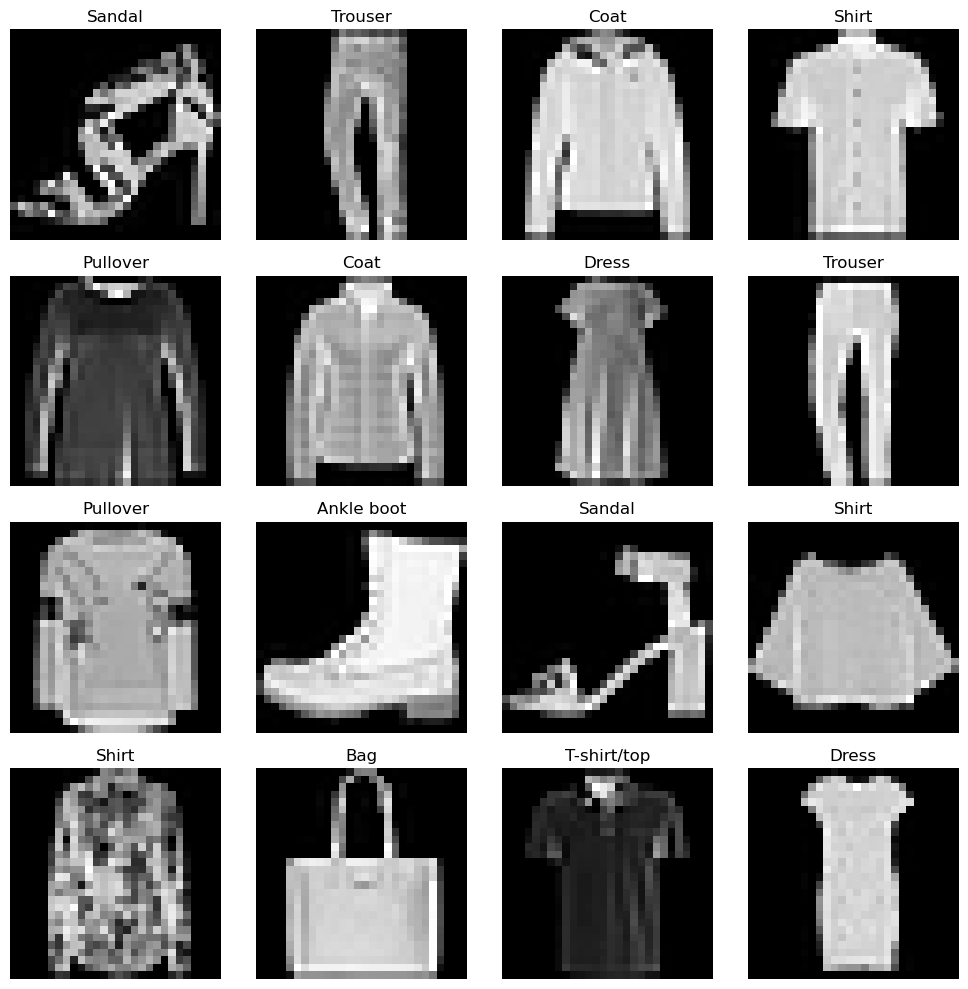

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
train_df = pd.read_csv('fashion-mnist_train.csv')

# Extract the labels and pixel data
train_labels = train_df['label']
train_data = train_df.iloc[:, 1:]

# Define the mapping of labels to class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 16 random samples with labels
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axs.ravel()):
    index = np.random.randint(0, len(train_data))
    img = train_data.iloc[index].values.reshape(28, 28)
    label = class_names[train_labels[index]]
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Train a multilayer perceptron
mlp = MLPClassifier(max_iter=300, random_state=42)

# Define the hyperparameters to search over
parameters = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 128)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'early_stopping': [True],
    'verbose': [True],
    'solver': ['adam', 'lbfgs'],
    'batch_size': [32, 64],
    'random_state': [42]
}

# Perform grid search to find the best hyperparameters
grid = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3, verbose=10)
grid.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:')
print(grid.best_params_)

# Train the MLP using the best hyperparameters and evaluate on the validation set
best_mlp = grid.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred_val = best_mlp.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print('Validation accuracy:', acc_val)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')
plt.tight_layout()
plt.show()
